Train

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          2  
1          2  
2          2  
3          2  
4          2

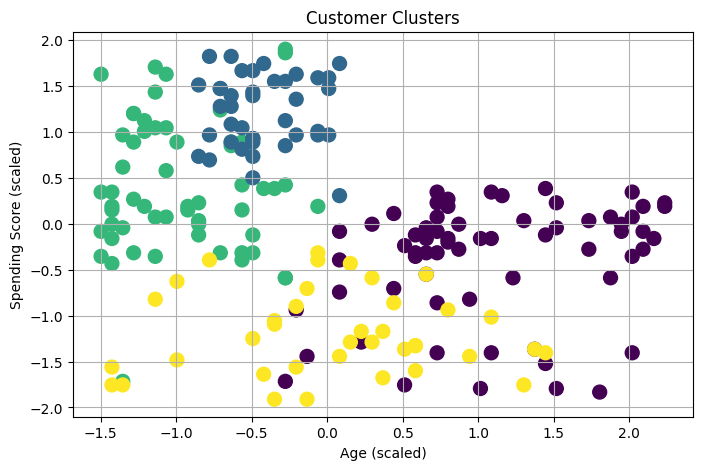

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load data
df = pd.read_csv("Mall_Customers.csv")

# Encode 'Gender' (optional)
le = LabelEncoder()
df['GenderEncoded'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# Select features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Show results
print(df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])

# Visualize clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Age (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Clusters')
plt.grid(True)
plt.show()


In [10]:
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          2  
1          2  
2          3  
3          3  
4          3

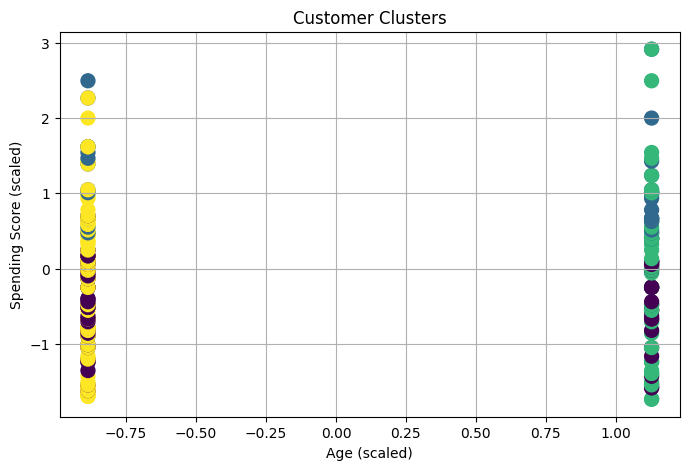

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# Load data
df = pd.read_csv("/content/Mall_Customers.csv")

# Encode Gender
le = LabelEncoder()
df['GenderEncoded'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# Include Gender in features
features = ['GenderEncoded', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Save model and scaler
joblib.dump(kmeans, 'kmeans_model_with_gender.pkl')
joblib.dump(scaler, 'scaler_with_gender.pkl')
joblib.dump(le, 'label_encoder.pkl')

# Optional: Show results
print(df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])

# Visualize clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Age (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Clusters')
plt.grid(True)
plt.show()


Test


In [30]:
import joblib
import numpy as np

# Load model, scaler, and label encoder
kmeans = joblib.load('kmeans_model_with_gender.pkl')
scaler = joblib.load('scaler_with_gender.pkl')
le = joblib.load('label_encoder.pkl')

# Get user input
gender = input("Enter Gender (Male/Female): ").strip().capitalize()
age = float(input("Enter Age: "))
income = float(input("Enter Annual Income (in k$): "))
spending_score = float(input("Enter Spending Score (1-100): "))

# Encode gender
gender_encoded = le.transform([gender])[0]

# Create input array and scale
user_data = np.array([[gender_encoded, age, income, spending_score]])
user_data_scaled = scaler.transform(user_data)

# Predict cluster
cluster = kmeans.predict(user_data_scaled)
print(f"The user belongs to Cluster: {cluster[0]}")


Enter Gender (Male/Female): Female
Enter Age: 20
Enter Annual Income (in k$): 1200
Enter Spending Score (1-100): 86
The user belongs to Cluster: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Module making

In [32]:
import joblib
import numpy as np

# Load model, scaler, and label encoder
kmeans = joblib.load('kmeans_model.pkl')
scaler = joblib.load('scaler.pkl')
le = joblib.load('label_encoder.pkl')

# Define cluster labels (modify these based on actual cluster characteristics)
cluster_info = {
    0: "Cluster 0: Young with high spending score – Target with premium offers and loyalty programs.",
    1: "Cluster 1: Older with low spending score – Possibly budget-conscious, target with discounts.",
    2: "Cluster 2: Average income and spending – Potential growth group, use personalized engagement.",
    3: "Cluster 3: High income but low spending – Encourage spending with luxury incentives.",
    4: "Cluster 4: Low income but high spending – Monitor for churn, offer value-based deals."
}

# Get user input
gender = input("Enter Gender (Male/Female): ").strip().capitalize()
age = float(input("Enter Age: "))
income = float(input("Enter Annual Income (in k$): "))
spending_score = float(input("Enter Spending Score (1-100): "))

# Encode gender
gender_encoded = le.transform([gender])[0]

# Create input array and scale
user_data = np.array([[gender_encoded, age, income, spending_score]])
user_data_scaled = scaler.transform(user_data)

# Predict cluster
cluster = kmeans.predict(user_data_scaled)[0]

# Output result
print(f"\nThe user belongs to Cluster {cluster}")
print(cluster_info.get(cluster, "Cluster description not available."))


Enter Gender (Male/Female): Male
Enter Age: 19
Enter Annual Income (in k$): 150000
Enter Spending Score (1-100): 99

The user belongs to Cluster 1
Cluster 1: Older with low spending score – Possibly budget-conscious, target with discounts.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
import joblib
import numpy as np

class CustomerSegmenter:
    def __init__(self, model_path, scaler_path, encoder_path):
        self.kmeans = joblib.load(model_path)
        self.scaler = joblib.load(scaler_path)
        self.le = joblib.load(encoder_path)

        # Define cluster descriptions
        self.cluster_info = {
            0: "Group1: Young with high spending score – Target with premium offers and loyalty programs.",
            1: "Group2: Older with low spending score – Possibly budget-conscious, target with discounts.",
            2: "Group3: Average income and spending – Potential growth group, use personalized engagement.",
            3: "Group4: High income but low spending – Encourage spending with luxury incentives.",
            4: "Group5: Low income but high spending – Monitor for churn, offer value-based deals."
        }

    def predict_group(self, gender, age, income, spending_score):
        # Encode gender
        gender_encoded = self.le.transform([gender.strip().capitalize()])[0]

        # Prepare and scale input
        user_data = np.array([[gender_encoded, age, income, spending_score]])
        user_data_scaled = self.scaler.transform(user_data)

        # Predict cluster
        cluster = self.kmeans.predict(user_data_scaled)[0]

        # Map to group
        group_description = self.cluster_info.get(cluster, "Group description not available.")
        return f"The user belongs to Group{cluster+1}\n{group_description}"


In [48]:
from segment import CustomerSegmenter

# Initialize the segmenter
segmenter = CustomerSegmenter(
    model_path='kmeans_model.pkl',
    scaler_path='scaler.pkl',
    encoder_path='label_encoder.pkl'
)

result = segmenter.predict_group(gender="Female", age=36, income=53, spending_score=86)
print(result)


The user belongs to Group4
Group4: High income but low spending – Encourage spending with luxury incentives.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
